# Delivery_time -> Predict delivery time using sorting time 

In [ ]:
# X(independent variable) – Sorting time,  Target variable y – delivery time 
# My equation will be Delivery Time(DT)= B0 + B1(Sorting time(ST))+ e (error)


In [25]:
# import Libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [2]:
data.info() # No null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
# Renaming Columns
data1=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\afrin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

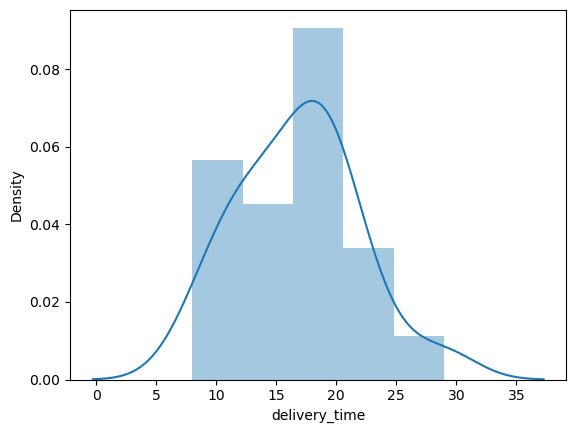

In [14]:
import seaborn as sns
sns.distplot(data1['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

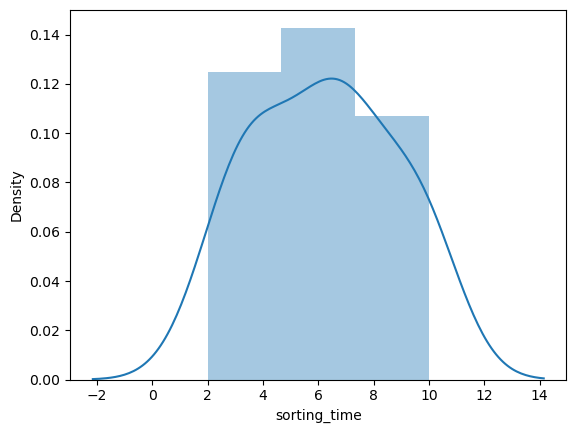

In [15]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data1['sorting_time']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x154663f51f0>,
 'caps': [<matplotlib.lines.Line2D at 0x154663f53a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x154663f5f10>],
 'medians': [<matplotlib.lines.Line2D at 0x154663f0430>],
 'fliers': [<matplotlib.lines.Line2D at 0x154663f0820>],
 'means': []}

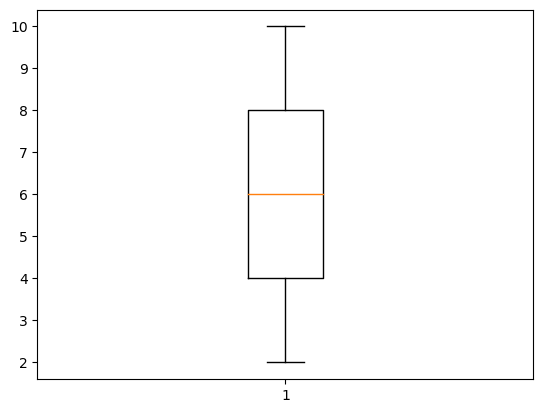

In [65]:
plt.boxplot(data1.sorting_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x154663f0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x15466409790>,
 'boxes': [<matplotlib.lines.Line2D at 0x15465f8f910>],
 'medians': [<matplotlib.lines.Line2D at 0x154661d5070>],
 'fliers': [<matplotlib.lines.Line2D at 0x15465f35d90>],
 'means': []}

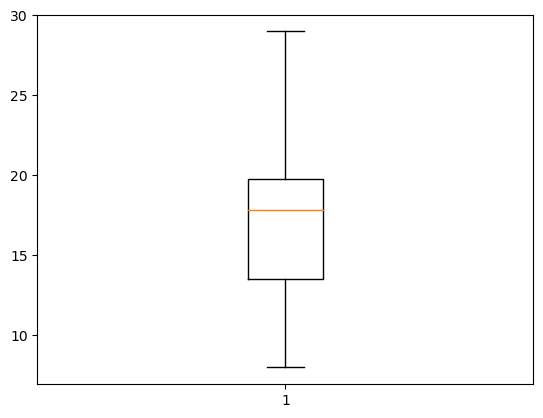

In [66]:
plt.boxplot(data1.delivery_time)

Text(0.5, 0, 'Sorting Time')

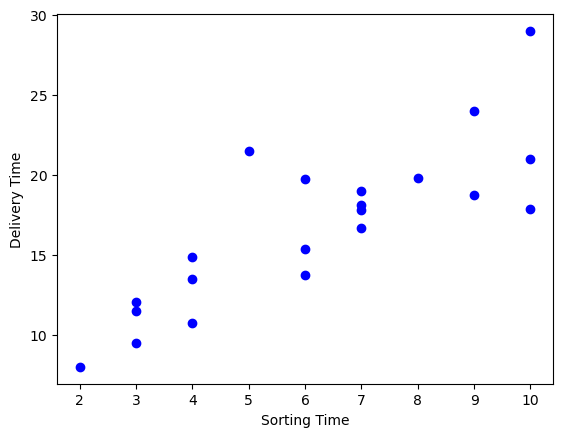

In [68]:
# Plotting scatter plot
plt.plot(data1.sorting_time,data1.delivery_time, "bo") 
plt.ylabel("Delivery Time")
plt.xlabel("Sorting Time") 

In [ ]:
# DT & ST are directly proportional to each other, +ve linear association between both.

# Correlation Analysis

In [6]:
data1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [ ]:
# Very strong positive Correlation between delivery time and sorting time is +0.82, 

# Model Building

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data1).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.98e-06
Time:                        16:15:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R2 value is only 68% we need to do transformation to increse the r2 value to get better model.
# Pvalue is <0.05 so Sorting_time is significant variable to predict the Salary

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

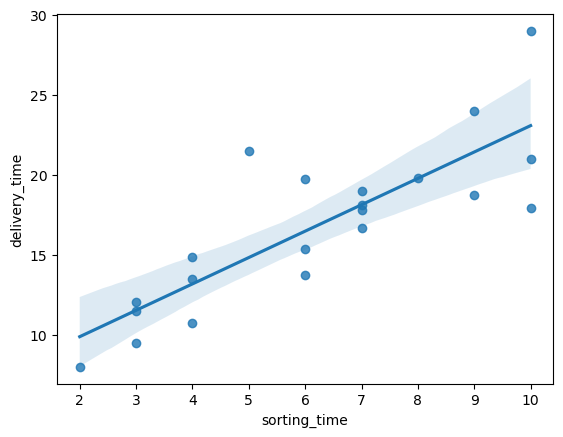

In [69]:
sns.regplot(x="sorting_time", y="delivery_time", data=data1)

# Error Analysis

In [21]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [22]:
pred = model.predict(data1.sorting_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [23]:
 model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [ ]:
# Root mean square value

In [26]:
rmse_lin = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'predicted value')

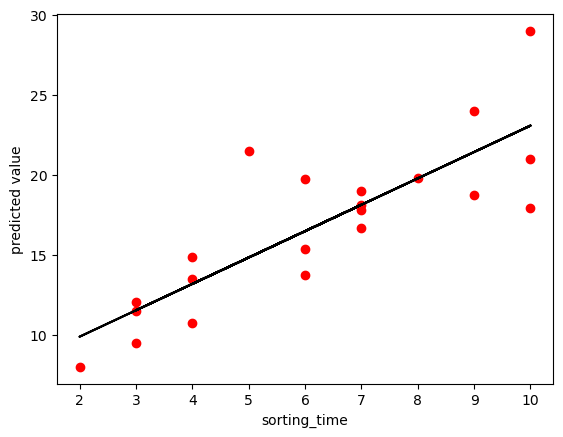

In [71]:
plt.scatter(x=data1['sorting_time'],y=data1['delivery_time'],color='red')
plt.plot(data1['sorting_time'],pred,color='black')
plt.xlabel('sorting_time')
plt.ylabel('predicted value') 

In [73]:
# log transformation
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=data1).fit()

In [74]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.64e-06
Time:                        15:53:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred2 = model2.predict(pd.DataFrame(data1['sorting_time'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [34]:
rmse_log = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [35]:
pred2.corr(data1.delivery_time)

0.8339325279256244

Text(0, 0.5, 'predicted value')

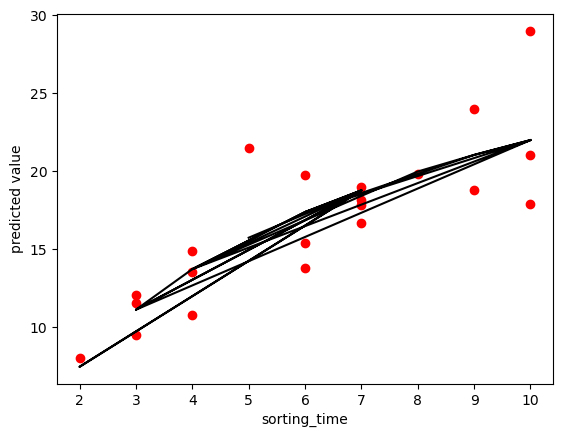

In [75]:
plt.scatter(x=data1['sorting_time'],y=data1['delivery_time'],color='red')
plt.plot(data1['sorting_time'],pred2,color='black')
plt.xlabel('sorting_time')
plt.ylabel('predicted value') 

In [76]:
#exponential model
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data1).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 15 May 2023   Prob (F-statistic):           1.59e-06
Time:                           15:59:37   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
pred_log = model3.predict(pd.DataFrame(data1['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [78]:
pred3=np.exp(pred_log)  # as we have used log(delivery_time) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [40]:
rmse_exp = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(pred3))**2)) 
rmse_exp 

2.940250323056201

In [41]:
pred3.corr(data1.delivery_time)

0.808578010828926

Text(0, 0.5, 'predicted value')

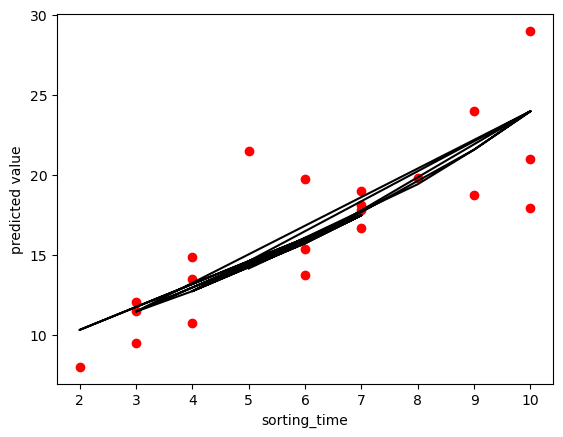

In [79]:
plt.scatter(x=data1['sorting_time'],y=data1['delivery_time'],color='red')
plt.plot(data1.sorting_time,pred3,color='black')
plt.xlabel('sorting_time')
plt.ylabel('predicted value') 

In [80]:
 model3.resid_pearson 

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

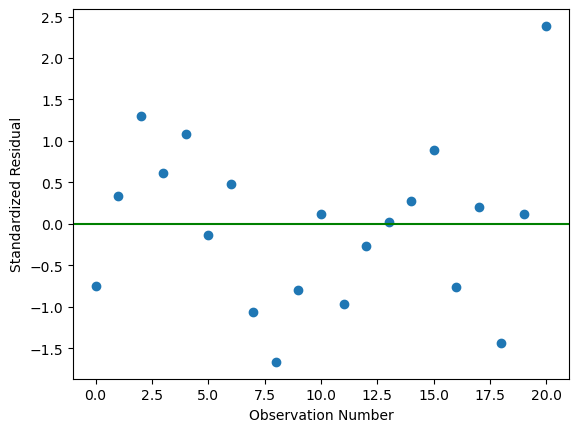

In [43]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Actual')

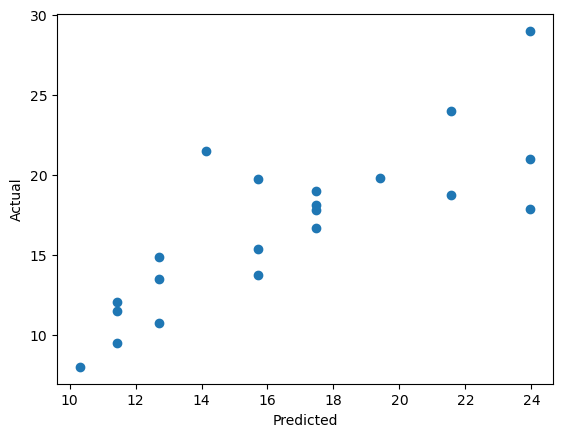

In [44]:
plt.scatter(x=pred3,y=data1.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [45]:
data1["sorting_time_Sq"] = data1.sorting_time*data1.sorting_time
data1

,delivery_time,sorting_time,sorting_time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [46]:
model_quad = smf.ols("np.log(delivery_time)~sorting_time+sorting_time_Sq",data=data1).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 15 May 2023   Prob (F-statistic):           2.20e-06
Time:                           12:32:44   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Now we got the R2 value 76.5% its more than 75% so we can consider this as best model 

In [82]:
pred_quad = model_quad.predict(data1)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [83]:
rmse_quad = np.sqrt(np.mean((np.array(data1['delivery_time'])-np.array(pred4))**2))
rmse_quad 

2.799041988740925

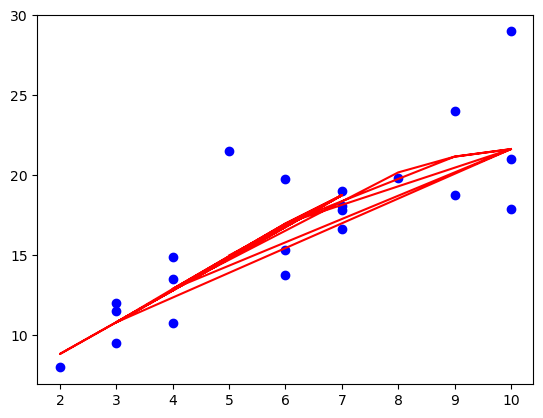

In [85]:
plt.scatter(data1.sorting_time,data1.delivery_time,c="b")
plt.plot(data1.sorting_time,pred4,"r")

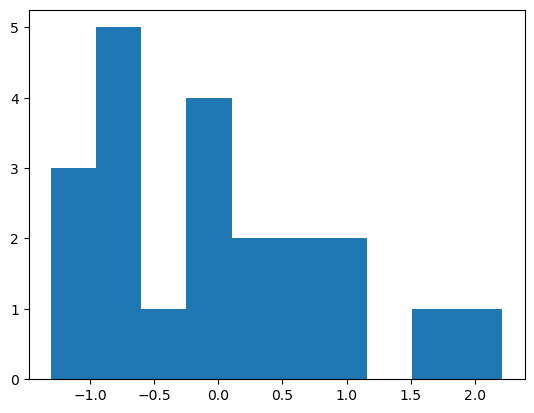

In [49]:
plt.hist(model_quad.resid_pearson)
plt.show()

In [86]:
data3 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data3)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


In [87]:
model_quad.params

Intercept          1.699704
sorting_time       0.265922
sorting_time_Sq   -0.012841
dtype: float64

In [53]:
# Manual prediction for sorting time 5
delivery_time = (1.699704) + (0.265922)*(5)
delivery_time

3.0293140000000003